### Setup

In [188]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None, 'display.max_rows', 100) 

from os import path

import seaborn as sns
sns.set_style('whitegrid')

import missingno as msno

import pandas_profiling

import datetime
import dateutil

### Import

In [118]:
d = '../data/raw'
f = 'loan.csv'

date_cols = [15, 26, 45, 47, 48]

data_raw = pd.read_csv(path.join(d,f), low_memory=False, parse_dates=date_cols)

In [119]:
data = data_raw.copy()
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,2011-12-01,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,1985-01-01,1.0,NaN,NaN,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,2015-01-01,171.62,NaT,2016-01-01,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,2011-12-01,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,1999-04-01,5.0,NaN,NaN,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,2013-04-01,119.66,NaT,2013-09-01,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,2001-11-01,2.0,NaN,NaN,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,2014-06-01,649.91,NaT,2016-01-01,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,1996-02-01,1.0,35.0,NaN,10.0,0.0,5598.0,21.0,37.0,f,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,2015-01-01,357.48,NaT,2015-01-01,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,2011-12-01,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,1996-01-01,0.0,38.0,NaN,15.0,0.0,27783.0,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,2016-01-01,67.79,2016-02-01,2016-01-01,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [120]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 74 columns):
id                             887379 non-null int64
member_id                      887379 non-null int64
loan_amnt                      887379 non-null float64
funded_amnt                    887379 non-null float64
funded_amnt_inv                887379 non-null float64
term                           887379 non-null object
int_rate                       887379 non-null float64
installment                    887379 non-null float64
grade                          887379 non-null object
sub_grade                      887379 non-null object
emp_title                      835922 non-null object
emp_length                     887379 non-null object
home_ownership                 887379 non-null object
annual_inc                     887375 non-null float64
verification_status            887379 non-null object
issue_d                        887379 non-null datetime64[ns]
loan_status  

In [121]:
data.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,8.873790e+05,8.873790e+05,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,8.873750e+05,887379.000000,887350.000000,887350.000000,433067.000000,137053.000000,887350.000000,887350.000000,8.873790e+05,886877.000000,887350.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887234.000000,221703.000000,887379.0,511.000000,509.000000,887350.000000,8.171030e+05,8.171030e+05,21372.000000,21372.000000,21372.000000,21372.000000,20810.000000,21372.000000,18617.000000,21372.000000,21372.000000,21372.000000,21372.000000,8.171030e+05,21372.000000,21372.000000,21372.000000
mean,3.246513e+07,3.500182e+07,14755.264605,14741.877625,14702.464383,13.246740,436.717127,7.502759e+04,18.157039,0.314442,0.694623,34.063798,70.117903,11.548469,0.195307,1.692079e+04,55.067693,25.268026,8403.124852,8399.713242,7558.826684,7521.160306,5757.706424,1754.804327,0.396692,45.919243,4.880757,2164.145585,0.014380,44.104838,1.0,109981.011585,18.310118,0.004991,2.257026e+02,1.394582e+05,1.109021,2.928832,0.761651,1.674574,20.912686,36552.811389,71.535317,1.389060,2.975482,5887.979740,60.831939,3.206862e+04,0.943945,1.537058,1.977307
std,2.282734e+07,2.411335e+07,8435.455601,8429.897657,8442.106732,4.381867,244.186593,6.469830e+04,17.190626,0.862244,0.998448,21.884940,28.127914,5.317313,0.582091,2.242679e+04,23.834344,11.840561,8493.450269,8489.997617,7871.243336,7846.108604,6625.441046,2095.356099,4.087825,409.693874,63.125281,4794.783233,0.134191,22.179841,0.0,52730.379847,7.169233,0.077625,1.031137e+04,1.537500e+05,1.242675,3.089987,0.996035,1.688725,27.209081,43103.833619,23.022862,1.520129,2.631886,5284.701239,20.013254,3.749826e+04,1.446872,2.723339,2.874067
min,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.320000,15.670000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,17950.000000,3.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,-4.000000
25%,9.206643e+06,1.087713e+07,8000.000000,8000.000000,8000.000000,9.990000,260.705000,4.500000e+04,11.910000,0.000000,0.000000,15.000000,51.000000,8.000000,0.000000,6.443000e+03,37.700000,17.000000,0.000000,0.000000,1914.590000,1899.700000,1200.570000,441.460000,0.000000,0.000000,0.000000,280.170000,0.000000,27.000000,1.0,76032.500000,13.200000,0.000000,0.000000e+00,2.985300e+04,0.000000,1.000000,0.000000,0.000000,6.000000,10251.500000,58.600000,0.000000,1.000000,2411.000000,47.700000,1.390000e+04,0.000000,0.000000,0.000000
50%,3.443327e+07,3.709528e+07,13000.000000,13000.000000,13000.000000,12.990000,382.550000,6.500000e+04,17.650000,0.000000,0.000000,31.000000,70.000000,11.000000,0.000000,1.187500e+04,56.000000,24.000000,6458.290000,6455.810000,4894.999117,4862.010000,3215.320000,1073.280000,0.000000,0.000000,0.000000,462.780000,0.000000,44.000000,1.0,101771.000000,17.610000,0.000000,0.000000e+00,8.055900e+04,1.000000,2.000000,0.000000,1.000000,12.000000,24684.500000,74.900000,1.000000,2.000000,4483.000000,61.900000,2.370000e+04,0.0000

In [122]:
data.describe(include=['O'])

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,initial_list_status,application_type,verification_status_joint
count,887379,887379,887379,835922,887379,887379,887379,887379,887379,887379,126029,887379,887228,887379,887379,887379,887379,511
unique,2,7,35,299272,12,6,3,10,2,887379,124470,14,63145,935,51,2,2,3
top,36 months,B,B3,Teacher,10+ years,MORTGAGE,Source Verified,Current,n,https://www.lendingclub.com/browse/loanDetail....,,debt_consolidation,Debt consolidation,945xx,CA,f,INDIVIDUAL,Not Verified
freq,621125,254535,56323,13469,291569,443557,329558,601779,887369,1,246,524215,414001,9770,129517,456848,886868,283


In [177]:
data.describe(include=['datetime'])

,issue_d,earliest_cr_line,last_pymnt_d,next_pymnt_d,last_credit_pull_d
count,887379,887350,869720,634408,887326
unique,103,697,98,100,103
top,2015-10-01 00:00:00,2001-08-01 00:00:00,2016-01-01 00:00:00,2016-02-01 00:00:00,2016-01-01 00:00:00
freq,48631,6659,470150,553406,730574
first,2007-06-01 00:00:00,1944-01-01 00:00:00,2007-12-01 00:00:00,2007-12-01 00:00:00,2007-05-01 00:00:00
last,2015-12-01 00:00:00,2012-11-01 00:00:00,2016-01-01 00:00:00,2016-03-01 00:00:00,2016-01-01 00:00:00


### Attribute Info

##### Borrower Info
- addr_state: The state provided by the borrower in the loan application (categorical: 2 char state code)
- annual_inc: The self-reported annual income provided by the borrower during registration (numeric)
- annual_inc_joint: The combined self-reported annual income provided by the co-borrowers during registration (numeric)
- emp_length: Employment length in years (categorical: '< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', '8 years' , '9 years', '10+ years')
- emp_title: The job title supplied by the Borrower when applying for the loan (text)
- home_ownership: The home ownership status provided by the borrower during registration. (categorical: 'RENT', 'OWN', 'MORTGAGE', 'OTHER')
- verification_status: Indicates if income was verified by LC, not verified, or if the income source was verified (categorical: 'Verified', 'Source Verified', 'Not Verified')
- member_id: A unique LC assigned Id for the borrower member (numeric)
- verification_status_joint: Indicates if the co-borrowers' joint income was verified by LC, not verified, or if the income source was verified (categorical: 'NaN', 'Verified', 'Source Verified', 'Not Verified')
- zip_code: The first 3 numbers of the zip code provided by the borrower in the loan application (categorical: '\[0-9\]\{3\}xx')

##### Loan Info
- application_type: Indicates whether the loan is an individual application or a joint application with two co-borrowers (categorical: 'INDIVIDUAL', 'JOINT')
- collection_recovery_fee: Post charge off collection fee (numeric)
- desc: Loan description provided by the borrower (text)
- grade: LC assigned loan grade (categorical: 'A',' B', 'C', 'D', 'E', 'F', 'G']
- id: A unique LC assigned ID for the loan listing (numeric)
- initial_list_status: The initial listing status of the loan (categorical: 'W', 'F')
- issue_d: The month which the loan was funded (date: Mon-Year)
- last_credit_pull_d: The most recent month LC pulled credit for this loan (date: Mon-Year)
- loan_status: Current status of the loan (categorical: 'Fully Paid', 'Charged Off', 'Current', 'Default', 'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)', 'Does not meet the credit policy. Status:Fully Paid', 'Does not meet the credit policy. Status:Charged Off', 'Issued')
- policy_code: publicly available policy_code=1; new products not publicly available policy_code=2 (categorical: '1', '2')
- purpose: A category provided by the borrower for the loan request (categorical: 'credit_card', 'car', 'small_business', 'other', 'wedding', 'debt_consolidation', 'home_improvement', 'major_purchase', 'medical', 'moving', 'vacation', 'house', 'renewable_energy', 'educational')
- sub_grade: LC assigned loan subgrade (categorical: '\[A-G\]\[1-5\]')
- title: The loan title provided by the borrower (text)
- url: URL for the LC page with listing data

##### Loan Finances
- funded_amnt: The total amount committed to that loan at that point in time (numeric)
- funded_amnt_inv: The total amount committed by investors for that loan at that point in time. (numeric)
- installment: The monthly payment owed by the borrower if the loan originates (numeric)
- int_rate:	Interest Rate on the loan (numeric)
- last_pymnt_amnt: Last total payment amount received (numeric)
- last_pymnt_d:	Last month payment was received (date: Mon-Year)
- loan_amnt: The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value (numeric)
- next_pymnt_d:	Next scheduled payment date (date: Mon-Year)
- out_prncp: Remaining outstanding principal for total amount funded (numeric)
- out_prncp_inv: Remaining outstanding principal for portion of total amount funded by investors (numeric)
- pymnt_plan: Indicates if a payment plan has been put in place for the loan (categorical: 'y', 'n')
- recoveries: post charge off gross recovery (numeric)
- term: The number of payments on the loan. Values are in months and can be either 36 or 60 (categorical: '36', '60')
- total_pymnt: Payments received to date for total amount funded (numeric)
- total_pymnt_inv: Payments received to date for portion of total amount funded by investors (numeric)
- total_rec_int: Interest received to date (numeric)
- total_rec_late_fee: Late fees received to date (numeric)
- total_rec_prncp: Principal received to date (numeric)

##### Borrower Credit History
- collections_12_mths_ex_med: Number of collections in 12 months excluding medical collections (numeric)
- delinq_2yrs: The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years (numeric)
- dti: A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage  and the requested LC loan, divided by the borrower’s self-reported monthly income. (numeric)
- dti_joint: A ratio calculated using the co-borrowers' total monthly payments on the total debt obligations, excluding mortgages and the requested LC loan, divided by the co-borrowers' combined self-reported monthly income (numeric)
- earliest_cr_line:	The month the borrower's earliest reported credit line was opened (date: Mon-Year)
- fico_range_high: The upper boundary range the borrower’s FICO at loan origination belongs to (MISSING)
- fico_range_low: The lower boundary range the borrower’s FICO at loan origination belongs to (MISSING)
- inq_last_6mths: The number of inquiries in past 6 months (excluding auto and mortgage inquiries) (numeric)
- last_fico_range_high	The upper boundary range the borrower’s last FICO pulled belongs to (MISSING)
- last_fico_range_low	The lower boundary range the borrower’s last FICO pulled belongs to (MISSING)
- mths_since_last_delinq: The number of months since the borrower's last delinquency (numeric)
- mths_since_last_major_derog: Months since most recent 90-day or worse rating (numeric)
- mths_since_last_record: The number of months since the last public record (numeric)
- open_acc:	The number of open credit lines in the borrower's credit file. (numeric)
- pub_rec: Number of derogatory public records (numeric)
- revol_bal: Total credit revolving balance (numeric)
- revol_util: Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit (numeric)
- total_acc: The total number of credit lines currently in the borrower's credit file (numeric)
- open_acc_6m: Number of open trades in last 6 months (numeric)
- open_il_6m: Number of currently active installment trades (numeric)
- open_il_12m: Number of installment accounts opened in past 12 months (numeric)
- open_il_24m: Number of installment accounts opened in past 24 months (numeric)
- mths_since_rcnt_il: Months since most recent installment accounts opened (numeric)
- total_bal_il:	Total current balance of all installment accounts (numeric)
- il_util: Ratio of total current balance to high credit/credit limit on all install acct (numeric)
- open_rv_12m: Number of revolving trades opened in past 12 months (numeric)
- open_rv_24m: Number of revolving trades opened in past 24 months (numeric)
- max_bal_bc: Maximum current balance owed on all revolving accounts (numeric)
- all_util: Balance to credit limit on all trades (numeric)
- total_rev_hi_lim:	Total revolving high credit/credit limit (numeric)
- inq_fi: Number of personal finance inquiries (numeric)
- total_cu_tl: Number of finance trades (numeric)
- inq_last_12m:	Number of credit inquiries in past 12 months (numeric)
- acc_now_delinq: The number of accounts on which the borrower is now delinquent (numeric)
- tot_coll_amt: Total collection amounts ever owed (numeric)
- tot_cur_bal: Total current balance of all accounts (numeric)

In [180]:
num_cols = ['annual_inc', 'annual_inc_joint', 'loan_amnt', 'collection_recovery_fee', 'funded_amnt', 'funded_amnt_inv',
            'installment', 'int_rate', 'last_pymnt_amnt', 'out_prncp', 'out_prncp_inv', 'recoveries', 'total_pymnt', 'total_pymnt_inv',
            'total_rec_int', 'total_rec_late_fee', 'total_rec_prncp', 'collections_12_mths_ex_med', 'delinq_2yrs', 'dti',
            'dti_joint', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_major_derog', 'mths_since_last_record',
            'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
            'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim',
            'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal']

cat_cols = ['emp_length', 'home_ownership', 'verification_status', 'verification_status_joint', 'zip_code',
            'application_type', 'grade', 'initial_list_status', 'loan_status', 'policy_code', 'purpose','sub_grade',
            'pymnt_plan', 'term', ]

date_cols = ['issue_d', 'last_credit_pull_d', 'last_pymnt_d', 'next_pymnt_d', 'earliest_cr_line']

id_cols = ['id', 'member_id']

text_cols = ['url', 'emp_title', 'desc', 'title']

### Data Cleaning

##### Default Loans

In [124]:
(data['loan_status'] == 'Default').sum()

1219

Very small proprotion of loans marked simply Default. Descriptions provided by LC imply that loans marked as both Default and Charged Off are to be treated as default.

In [227]:
data['default'] = data['loan_status'].str.contains('(?i)(?:Default|Charged Off)', regex=True).astype(int)

In [228]:
data['default'].value_counts()

0    840151
1     47228
Name: default, dtype: int64

##### Null Numerical Data

In [128]:
data.shape

(887379, 75)

In [133]:
null_num_sum = data[num_cols].isnull().sum()
pd.DataFrame({'not null': data.shape[0] - null_num_sum, 'null':null_num_sum, '% null': null_num_sum/data.shape[0]})[['not null', 'null', '% null']]

,not null,null,% null
annual_inc,887375,4,0.000005
annual_inc_joint,511,886868,0.999424
loan_amnt,887379,0,0.000000
collection_recovery_fee,887379,0,0.000000
funded_amnt,887379,0,0.000000
funded_amnt_inv,887379,0,0.000000
installment,887379,0,0.000000
int_rate,887379,0,0.000000
last_pymnt_amnt,887379,0,0.000000
out_prncp,887379,0,0.000000


Seems to be a recurring 29 missing values. Will see if dropping these fixes all instances:

In [198]:
data.dropna(subset=['open_acc'])[num_cols].isnull().sum()

annual_inc                          0
annual_inc_joint               886839
loan_amnt                           0
collection_recovery_fee             0
funded_amnt                         0
funded_amnt_inv                     0
installment                         0
int_rate                            0
last_pymnt_amnt                     0
out_prncp                           0
out_prncp_inv                       0
recoveries                          0
total_pymnt                         0
total_pymnt_inv                     0
total_rec_int                       0
total_rec_late_fee                  0
total_rec_prncp                     0
collections_12_mths_ex_med        116
delinq_2yrs                         0
dti                                 0
dti_joint                      886841
inq_last_6mths                      0
mths_since_last_delinq         454283
mths_since_last_major_derog    665647
mths_since_last_record         750297
open_acc                            0
pub_rec     

Appears to have eliminated all of the 29 NaN records.

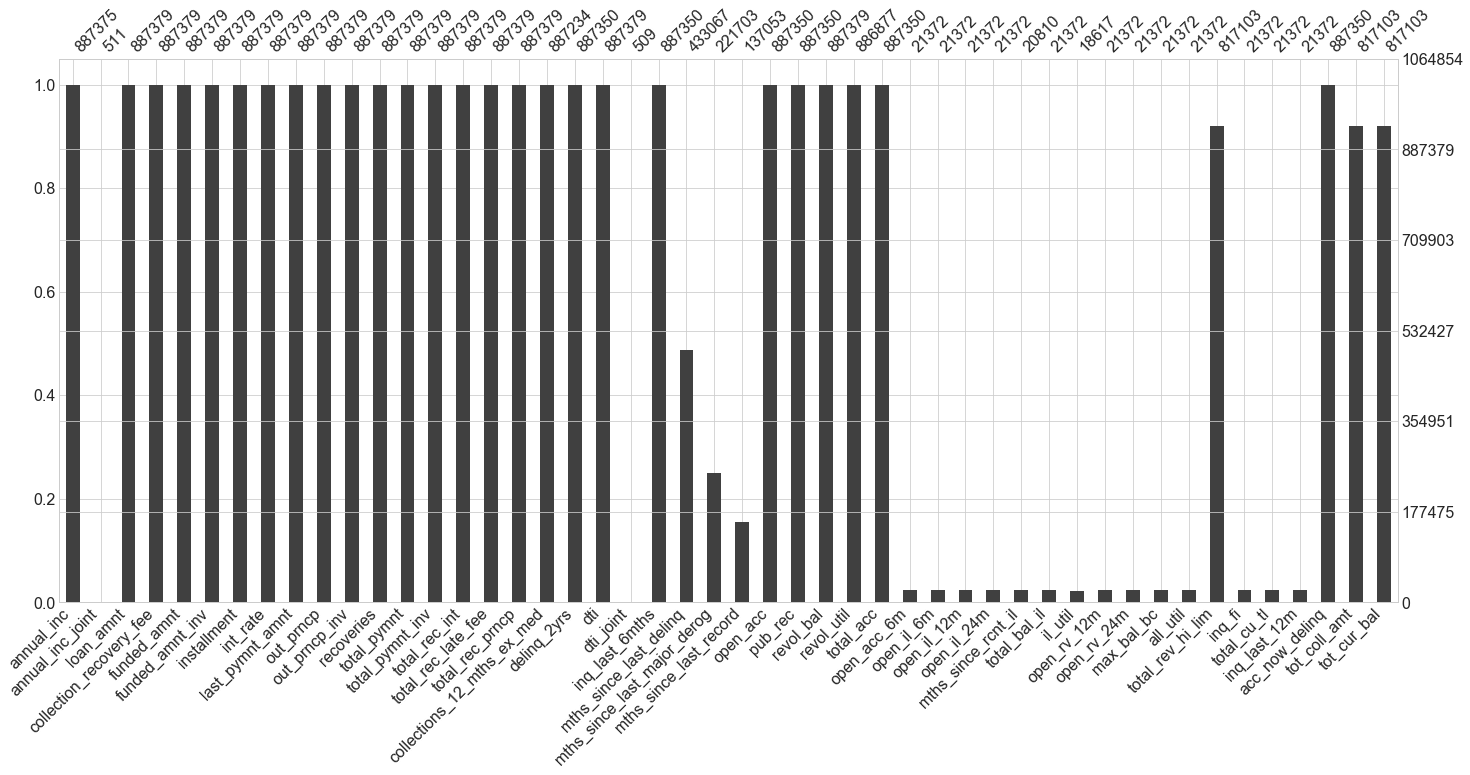

In [113]:
msno.bar(data[num_cols], labels=True)

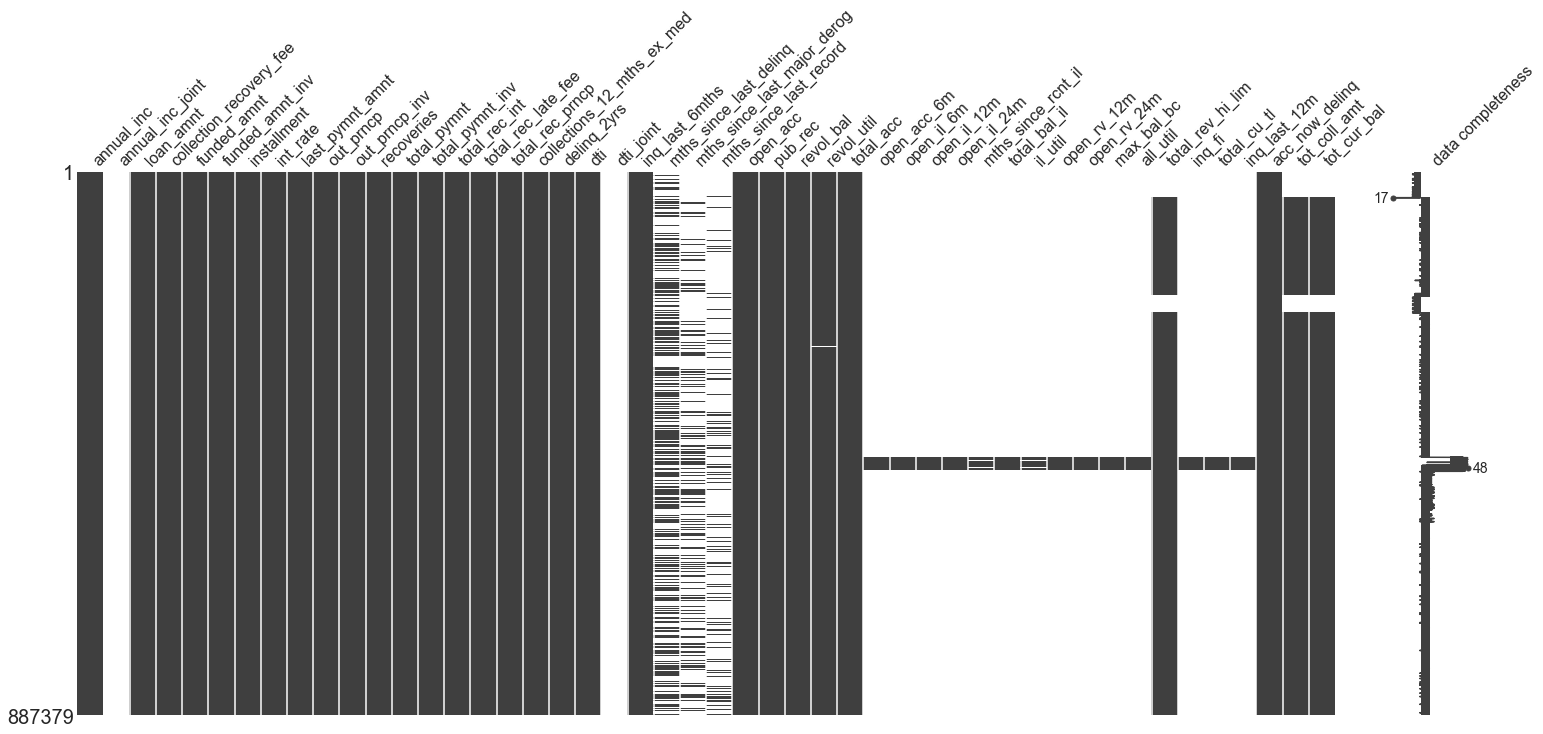

In [147]:
msno.matrix(data[num_cols], labels=True)

Check to see if the large areas of missing time data are tied to older records:

In [217]:
temp = data[(datetime.datetime(year=2015, month=1, day=1)) <= data['issue_d']]

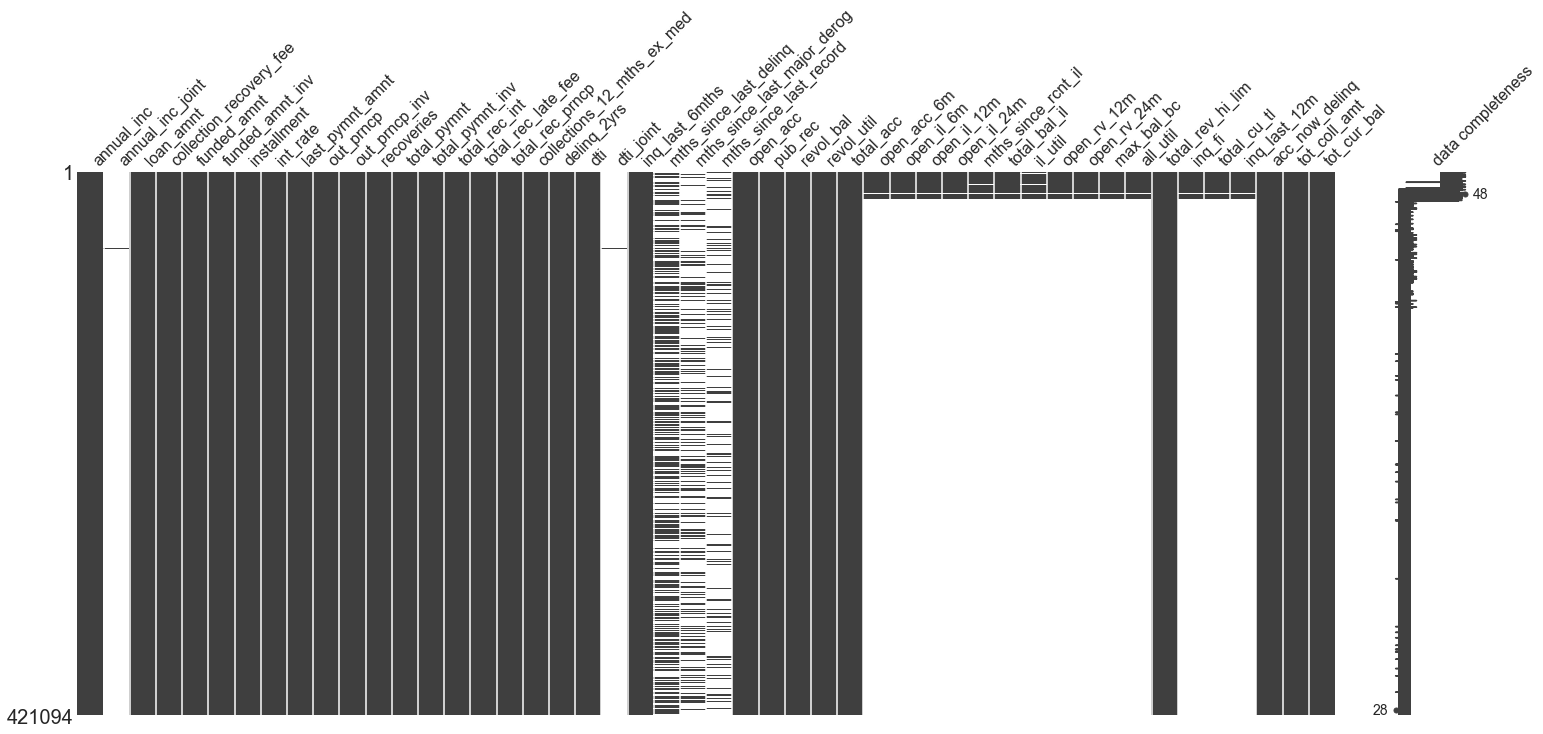

In [218]:
msno.matrix(temp[num_cols], labels=True)

Does not seem to make too much of an impact. Still an overwhelming proportion of the same column data missing for 2015. Imputing is not realistic so will need to remove those columns:

In [219]:
num_cols_remove = ['open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util',
                   'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl', 'inq_last_12m']

'mnths_since_last_delinq', 'mths_since_last_major_derog', and 'mths_since_last_record' are also quite sparse, which is very likely a result of records which have no delinquency etc. on record. Consequently, to better represent all records these will be converted to a true/false indicator:

In [225]:
data['had_delinq'] = data['mths_since_last_delinq'].apply(lambda x: 1 if x > 0 else 0)
data['had_major_derog'] = data['mths_since_last_major_derog'].apply(lambda x: 1 if x > 0 else 0)
data['had_record'] = data['mths_since_last_record'].apply(lambda x: 1 if x > 0 else 0)

As for the two columns capturing joint borrower info ('annual_inc_joint', 'dti_joint'), it is evident that the missing data is simply for those records with an application type of 'INDIVIDUAL':

In [232]:
((data['application_type'] == 'INDIVIDUAL') & ~(np.isnan(data['annual_inc_joint']) | np.isnan(data['dti_joint']))).sum()

0

There are only a little over 500 records of type 'JOINT', so whilst the impact of removing these records should be minimial it is also fairly straightforward to create a form of merged annual_inc and dti column using the data from both columns for individual and joint (with joint taking priority):

In [242]:
data['annual_inc_merged'] = data.apply(lambda x: x['annual_inc'] if x['application_type'] == 'INDIVIDUAL' else x['annual_inc_joint'], axis=1)

In [243]:
data['dti_merged'] = data.apply(lambda x: x['dti'] if x['application_type'] == 'INDIVIDUAL' else x['dti_joint'], axis=1)

In [244]:
num_cols_remove += ['annual_inc_joint', 'dti_joint']

##### Null Categorical Data

In [178]:
null_cat_sum = data[cat_cols].isnull().sum()
pd.DataFrame({'not null': data.shape[0] - null_cat_sum, 'null':null_cat_sum, '% null': null_cat_sum/data.shape[0]})[['not null', 'null', '% null']]

,not null,null,% null
emp_length,887379,0,0.000000
home_ownership,887379,0,0.000000
verification_status,887379,0,0.000000
verification_status_joint,511,886868,0.999424
zip_code,887379,0,0.000000
application_type,887379,0,0.000000
grade,887379,0,0.000000
initial_list_status,887379,0,0.000000
loan_status,887379,0,0.000000
policy_code,887379,0,0.000000


##### Null Date Data

In [182]:
null_date_sum = data[date_cols].isnull().sum()
pd.DataFrame({'not null': data.shape[0] - null_date_sum, 'null':null_date_sum, '% null': null_date_sum/data.shape[0]})[['not null', 'null', '% null']]

,not null,null,% null
issue_d,887379,0,0.000000
last_credit_pull_d,887326,53,0.000060
last_pymnt_d,869720,17659,0.019900
next_pymnt_d,634408,252971,0.285077
earliest_cr_line,887350,29,0.000033


earliest_cr_line may possibly share the

In [183]:
data[data['earliest_cr_line'].isnull()]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default
42449,79967,79912,5000.0,5000.0,3025.0,36 months,7.43,155.38,A,A2,NaN,< 1 year,NONE,NaN,Not Verified,2007-08-01,Does not meet the credit policy. Status:Fully ...,n,https://www.lendingclub.com/browse/loanDetail....,I will be relocating to Boston next month and ...,other,Moving expenses,100xx,NY,1.00,NaN,NaT,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,f,0.0,0.0,5593.46,3384.01,5000.00,593.46,0.000000,0.00,0.0000,2010-08-01,157.31,2010-09-01,2007-05-01,NaN,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
42450,79924,79906,7000.0,7000.0,3450.0,36 months,7.75,218.55,A,A3,NaN,< 1 year,NONE,NaN,Not Verified,2007-08-01,Does not meet the credit policy. Status:Fully ...,n,https://www.lendingclub.com/browse/loanDetail....,"I am borrowing $7,000 for tuition and other ex...",other,Education,100xx,NY,1.00,NaN,NaT,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,f,0.0,0.0,7867.53,3877.59,7000.00,867.53,0.000000,0.00,0.0000,2010-08-01,220.03,2010-09-01,2007-05-01,NaN,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
42459,71823,70473,4350.0,4350.0,825.0,36 months,8.07,136.45,A,A4,NaN,< 1 year,RENT,120000.0,Not Verified,2007-08-01,Does not meet the credit policy. Status:Fully ...,n,https://www.lendingclub.com/browse/loanDetail....,"I owe $4,350 in medical bills not covered by m...",other,Paying medical bill,024xx,MA,4.00,NaN,NaT,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,f,0.0,0.0,4911.68,931.41,4350.00,561.68,0.000000,0.00,0.0000,2010-08-01,139.93,2010-09-01,NaT,NaN,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
42472,72197,72194,3900.0,3900.0,2025.0,36 months,9.33,124.62,B,B3,NaN,< 1 year,RENT,98000.0,Not Verified,2007-08-01,Does not meet the credit policy. Status:Fully ...,n,https://www.lendingclub.com/browse/loanDetail....,I will be moving to Florida next month. This l...,other,Moving to Florida,100xx,NY,10.00,NaN,NaT,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,f,0.0,0.0,4485.99,2329.19,3900.00,585.99,0.000000,0.00,0.0000,2010-08-01,126.06,2010-09-01,2007-05-01,NaN,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
42480,79893,79878,6700.0,6700.0,6700.0,36 months,7.75,209.18,A,A3,NaN,< 1 year,NONE,NaN,Not Verified,2007-07-01,Does not meet the credit policy. Status:Fully ...,n,https://www.lendingclub.com/browse/loanDetail....,I am moving to Florida and would like to borro...,other,Moving expenses and security deposit,100xx,NY,1.00,NaN,NaT,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,f,0.0,0.0,7530.42,7530.42,6700.00,830.42,0.000000,0.00,0.0000,2010-07-01,209.89,2010-08-01,2007-05-01,NaN,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
42483,73003,70651,3200.0,3200.0,2000.0,36 months,9.96,103.20,B,B5,NaN,< 1 year,MORTGAGE,150000.0,Not Verified,2007-07-01,Does not meet the credit policy. Status:Fully ...,n,https://www.lendingclub.com/browse/loanDetail....,"Hi, I am looking

In [189]:
null_sum = data.dropna(subset=['earliest_cr_line']).isnull().sum()
pd.DataFrame({'not null': data.shape[0] - null_sum, 'null':null_sum, '% null': null_sum/data.shape[0]})[['not null', 'null', '% null']]

,not null,null,% null
id,887379,0,0.000000
member_id,887379,0,0.000000
loan_amnt,887379,0,0.000000
funded_amnt,887379,0,0.000000
funded_amnt_inv,887379,0,0.000000
term,887379,0,0.000000
int_rate,887379,0,0.000000
installment,887379,0,0.000000
grade,887379,0,0.000000
sub_grade,887379,0,0.000000


In [211]:
data['revol_util_manual'] = data['revol_bal'] / data['total_rev_hi_lim']

In [206]:
data[['revol_bal', 'revol_util', 'revol_util_manual', 'total_rev_hi_lim']]

,revol_bal,revol_util,revol_util_manual,total_rev_hi_lim
0,13648.0,83.70,NaN,NaN
1,1687.0,9.40,NaN,NaN
2,2956.0,98.50,NaN,NaN
3,5598.0,21.00,NaN,NaN
4,27783.0,53.90,NaN,NaN
5,7963.0,28.30,NaN,NaN
6,17726.0,85.60,NaN,NaN
7,8221.0,87.50,NaN,NaN
8,5210.0,32.60,NaN,NaN
9,9279.0,36.50,NaN,NaN


In [210]:
data[(data['revol_util'].isnull())][['revol_bal', 'revol_util', 'revol_util_manual', 'total_rev_hi_lim']]

,revol_bal,revol_util,revol_util_manual,total_rev_hi_lim
3577,0.0,NaN,0.0,NaN
4730,0.0,NaN,0.0,NaN
4960,0.0,NaN,0.0,NaN
11315,0.0,NaN,0.0,NaN
12076,0.0,NaN,0.0,NaN
12181,0.0,NaN,0.0,NaN
13930,0.0,NaN,0.0,NaN
18045,0.0,NaN,0.0,NaN
18247,0.0,NaN,0.0,NaN
21669,0.0,NaN,0.0,NaN


In [209]:
data['revol_util_manual'] = data.apply(lambda x: 0 if x['revol_bal'] == 0 and np.isnan(x['revol_util']) else None, axis=1)